In [1]:
import requests
from bs4 import BeautifulSoup as BS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  

In [2]:
#read in all csv's:

full_2016 = pd.read_csv('../data/full_2016.csv')
full_2017 = pd.read_csv('../data/full_2017.csv')
full_2018 = pd.read_csv('../data/full_2018.csv')
full_2019 = pd.read_csv('../data/full_2019.csv')
half_2016 = pd.read_csv('../data/half_2016.csv')
half_2017 = pd.read_csv('../data/half_2017.csv')
half_2018 = pd.read_csv('../data/half_2018.csv')
half_2019 = pd.read_csv('../data/half_2019.csv')

QUESTIONS TO EXPLORE:
NOTE: The course time limit for the Rock ‘n’ Roll Nashville Marathon is 6 hours and the Half Marathon is 4 hours.
-number that did not finish each race?
-variations in number of participants for each race?
-most common finishing time?
-number of people that participated in more than one race?
-people that did the half and then full (or vice versa)?
-2018 half marathon - no zero times?
-avg time per year vs overall avg (line 18 of eda workflow)

In [3]:
#adding year column to each dataframe:

#df['Name']='abc'

half_2016['Year']='2016'
half_2017['Year']='2017'
half_2018['Year']='2018'
half_2019['Year']='2019'

full_2016['Year']='2016'
full_2017['Year']='2017'
full_2018['Year']='2018'
full_2019['Year']='2019'

In [4]:
#Checked each to make sure adding year column worked:

full_2019.head(3)

,Overall,Bib,Name,Time,Year
0,1,30001,Travis Peruski,01:37:54,2019
1,2,1,Scott Wietecha,02:34:59,2019
2,3,4,Jordan Wilson,02:35:24,2019


In [5]:
#change time to datetime format:
#Both of these appear to do the same thing:

#half_2016.Time = pd.to_datetime(half_2016.Time, format='%H:%M:%S') - 
#                pd.to_datetime(half_2016.Time, format='%H:%M:%S').dt.normalize()

half_2016.Time = pd.to_timedelta(half_2016.Time)
half_2017.Time = pd.to_timedelta(half_2017.Time)
half_2018.Time = pd.to_timedelta(half_2018.Time)
half_2019.Time = pd.to_timedelta(half_2019.Time)

full_2016.Time = pd.to_timedelta(full_2016.Time)
full_2017.Time = pd.to_timedelta(full_2017.Time)
full_2018.Time = pd.to_timedelta(full_2018.Time)
full_2019.Time = pd.to_timedelta(full_2019.Time)

In [6]:
half_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22429 entries, 0 to 22428
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype          
---  ------   --------------  -----          
 0   Overall  22429 non-null  int64          
 1   Bib      22429 non-null  int64          
 2   Name     22429 non-null  object         
 3   Time     22429 non-null  timedelta64[ns]
 4   Year     22429 non-null  object         
dtypes: int64(2), object(2), timedelta64[ns](1)
memory usage: 876.3+ KB


In [7]:
half_2016.Time.value_counts()

00:00:00    4509
02:17:14      13
02:15:06      12
02:18:20      12
02:05:51      11
            ... 
02:53:38       1
01:37:57       1
02:52:18       1
02:54:26       1
03:30:32       1
Name: Time, Length: 6669, dtype: int64

In [8]:
half_2016.describe()

,Overall,Bib,Time
count,22429.000000,22429.000000,22429
mean,27362.582416,21316.413705,0 days 02:01:23.650185
std,36750.643425,11794.480952,0 days 01:07:43.709719
min,1.000000,2.000000,0 days 00:00:00
25%,5683.000000,11207.000000,0 days 01:49:23
50%,11353.000000,21431.000000,0 days 02:17:11
75%,17034.000000,32097.000000,0 days 02:43:07
max,99999.000000,40723.000000,0 days 04:54:41


In [9]:
half_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22292 entries, 0 to 22291
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype          
---  ------   --------------  -----          
 0   Overall  22292 non-null  int64          
 1   Bib      22292 non-null  int64          
 2   Name     22292 non-null  object         
 3   Time     22292 non-null  timedelta64[ns]
 4   Year     22292 non-null  object         
dtypes: int64(2), object(2), timedelta64[ns](1)
memory usage: 870.9+ KB


In [10]:
half_2017.Time.value_counts()

00:00:00    4580
02:42:29      13
02:17:56      13
02:26:38      12
02:23:56      11
            ... 
03:28:53       1
03:42:55       1
04:06:40       1
01:39:54       1
03:39:37       1
Name: Time, Length: 7093, dtype: int64

In [11]:
half_2017.describe()

,Overall,Bib,Time
count,22292.000000,22292.000000,22292
mean,27703.379194,21472.545039,0 days 02:10:17.297416
std,37115.620449,11751.348954,0 days 01:13:28.948268
min,1.000000,201.000000,0 days 00:00:00
25%,5633.750000,11258.750000,0 days 01:55:14
50%,11260.500000,21511.500000,0 days 02:28:41.500000
75%,16901.250000,32161.250000,0 days 02:57:04
max,99999.000000,45422.000000,0 days 06:18:24


In [12]:
half_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14940 entries, 0 to 14939
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype          
---  ------   --------------  -----          
 0   Overall  14940 non-null  int64          
 1   Bib      14940 non-null  int64          
 2   Name     14940 non-null  object         
 3   Time     14940 non-null  timedelta64[ns]
 4   Year     14940 non-null  object         
dtypes: int64(2), object(2), timedelta64[ns](1)
memory usage: 583.7+ KB


In [13]:
half_2018.Time.value_counts()
#Did no one NOT finish in 2018??

02:24:09    12
02:08:14    11
02:13:32    11
02:26:47    10
02:06:46    10
            ..
03:03:54     1
01:49:29     1
03:02:14     1
01:48:25     1
04:29:19     1
Name: Time, Length: 6337, dtype: int64

In [14]:
half_2018.describe()

,Overall,Bib,Time
count,14940.000000,14940.000000,14940
mean,7469.300268,11319.216332,0 days 02:31:56.171285
std,4313.149007,6654.258783,0 days 00:34:29.395408
min,1.000000,103.000000,0 days 01:09:25
25%,3732.000000,6192.750000,0 days 02:07:21
50%,7470.000000,10909.500000,0 days 02:25:36
75%,11203.000000,15810.250000,0 days 02:51:18
max,14940.000000,60038.000000,0 days 06:26:37


In [15]:
half_2018.tail()

,Overall,Bib,Name,Time,Year
14935,14935,8337,Kayleah Maddock,06:04:28,2018
14936,14937,32614,Kim Donaldson,06:05:35,2018
14937,14938,31720,Pamela Hagens,06:12:15,2018
14938,14939,33664,Fatima Rego,06:12:24,2018
14939,14940,33532,Annie Friar,06:26:37,2018


In [16]:
half_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17236 entries, 0 to 17235
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype          
---  ------   --------------  -----          
 0   Overall  17236 non-null  int64          
 1   Bib      17236 non-null  int64          
 2   Name     17236 non-null  object         
 3   Time     17236 non-null  timedelta64[ns]
 4   Year     17236 non-null  object         
dtypes: int64(2), object(2), timedelta64[ns](1)
memory usage: 673.4+ KB


In [17]:
half_2019.Time.value_counts().head(10)

00:00:00    3530
02:49:53      10
02:24:27      10
02:24:07      10
02:22:37      10
02:27:45      10
01:53:52      10
02:25:39      10
02:52:30      10
02:12:02       9
Name: Time, dtype: int64

In [18]:
half_2019.describe()

,Overall,Bib,Time
count,17236.000000,17236.000000,17236
mean,25930.060861,10026.398990,0 days 02:00:58.442562
std,37755.950820,5992.240419,0 days 01:08:39.412259
min,1.000000,31.000000,0 days 00:00:00
25%,4309.750000,5314.750000,0 days 01:47:24
50%,8618.500000,9669.500000,0 days 02:16:24
75%,12927.250000,14053.250000,0 days 02:43:37.250000
max,99999.000000,50470.000000,0 days 05:52:56


In [19]:
full_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3842 entries, 0 to 3841
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype          
---  ------   --------------  -----          
 0   Overall  3842 non-null   int64          
 1   Bib      3842 non-null   int64          
 2   Name     3842 non-null   object         
 3   Time     3842 non-null   timedelta64[ns]
 4   Year     3842 non-null   object         
dtypes: int64(2), object(2), timedelta64[ns](1)
memory usage: 150.2+ KB


In [20]:
full_2016.Time.value_counts()

00:00:00    864
04:53:54      5
05:02:13      4
03:58:51      4
04:54:16      4
           ... 
03:48:14      1
05:01:49      1
03:48:46      1
03:49:02      1
04:50:16      1
Name: Time, Length: 2492, dtype: int64

In [21]:
full_2016.describe()

,Overall,Bib,Time
count,3842.000000,3842.000000,3842
mean,24301.906559,15431.385216,0 days 03:43:09.756637
std,41576.036228,8600.621622,0 days 02:07:35.096420
min,1.000000,1.000000,0 days 00:00:00
25%,963.250000,7298.250000,0 days 03:25:47.250000
50%,1925.500000,16104.500000,0 days 04:26:49
75%,2889.750000,24009.750000,0 days 05:10:26.750000
max,99999.000000,45340.000000,0 days 07:00:00


In [22]:
full_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3651 entries, 0 to 3650
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype          
---  ------   --------------  -----          
 0   Overall  3651 non-null   int64          
 1   Bib      3651 non-null   int64          
 2   Name     3651 non-null   object         
 3   Time     3651 non-null   timedelta64[ns]
 4   Year     3651 non-null   object         
dtypes: int64(2), object(2), timedelta64[ns](1)
memory usage: 142.7+ KB


In [23]:
full_2017.Time.value_counts()

00:00:00    1056
05:10:10       5
05:13:01       5
04:47:18       4
05:28:57       4
            ... 
05:10:21       1
05:10:37       1
05:10:45       1
03:57:34       1
04:53:16       1
Name: Time, Length: 2170, dtype: int64

In [24]:
full_2017.describe()

,Overall,Bib,Time
count,3651.000000,3651.000000,3651
mean,33289.681183,14918.875103,0 days 03:28:49.074774
std,46253.370294,8697.259055,0 days 02:17:29.405818
min,1.000000,1.000000,0 days 00:00:00
25%,913.500000,7139.500000,0 days 00:00:00
50%,1826.000000,15104.000000,0 days 04:37:11
75%,99999.000000,23041.500000,0 days 05:12:08
max,99999.000000,111126.000000,0 days 06:38:19


In [25]:
full_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype          
---  ------   --------------  -----          
 0   Overall  2115 non-null   int64          
 1   Bib      2115 non-null   int64          
 2   Name     2115 non-null   object         
 3   Time     2115 non-null   timedelta64[ns]
 4   Year     2115 non-null   object         
dtypes: int64(2), object(2), timedelta64[ns](1)
memory usage: 82.7+ KB


In [26]:
full_2018.Time.value_counts()

00:00:00    8
04:30:58    5
05:21:48    4
05:51:14    4
04:24:58    4
           ..
03:43:02    1
04:56:45    1
04:57:17    1
04:57:41    1
04:48:56    1
Name: Time, Length: 1816, dtype: int64

In [27]:
full_2018.describe()

,Overall,Bib,Time
count,2115.000000,2115.000000,2115
mean,1428.099291,31516.055792,0 days 04:47:41.253900
std,6105.518608,3209.627967,0 days 00:50:43.372450
min,1.000000,1.000000,0 days 00:00:00
25%,529.500000,30847.000000,0 days 04:12:41.500000
50%,1058.000000,31659.000000,0 days 04:48:18
75%,1586.500000,32663.000000,0 days 05:23:53
max,99999.000000,60042.000000,0 days 06:54:09


In [28]:
full_2018.tail(10)

,Overall,Bib,Name,Time,Year
2105,2106,33359,Theresa Khayyam,06:51:56,2018
2106,2107,30018,Harold Martin,06:54:09,2018
2107,99999,33530,Brandon Wynsma,00:00:00,2018
2108,99999,32166,Janna Chew,00:00:00,2018
2109,99999,31683,Aubrey Spaeth,00:00:00,2018
2110,99999,33654,Jeff Ekkart,00:00:00,2018
2111,99999,31170,Austin Perkins,00:00:00,2018
2112,99999,30482,David Ramos,00:00:00,2018
2113,99999,33461,Emily Eagerton,00:00:00,2018
2114,99999,31515,Tony Quernemoen,00:00:00,2018


In [29]:
full_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811 entries, 0 to 2810
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype          
---  ------   --------------  -----          
 0   Overall  2811 non-null   int64          
 1   Bib      2811 non-null   int64          
 2   Name     2811 non-null   object         
 3   Time     2811 non-null   timedelta64[ns]
 4   Year     2811 non-null   object         
dtypes: int64(2), object(2), timedelta64[ns](1)
memory usage: 109.9+ KB


In [30]:
full_2019.Time.value_counts()

00:00:00    786
05:08:53      4
04:56:44      4
04:26:51      4
05:14:27      4
           ... 
05:48:40      1
05:48:56      1
05:25:59      1
03:23:02      1
04:51:52      1
Name: Time, Length: 1787, dtype: int64

In [31]:
full_2019.describe()

,Overall,Bib,Time
count,2811.000000,2811.000000,2811
mean,28691.049093,31362.208822,0 days 03:23:12.044468
std,44436.624468,3029.008741,0 days 02:12:22.159116
min,1.000000,1.000000,0 days 00:00:00
25%,703.500000,30783.500000,0 days 00:00:00
50%,1406.000000,31587.000000,0 days 04:17:09
75%,99999.000000,32399.000000,0 days 04:59:57
max,99999.000000,50463.000000,0 days 06:43:55


In [32]:
#Combining all Half and Full marathon dataframes together for further analysis:

half_all = pd.concat([half_2016, half_2017, half_2018, half_2019])
print(half_all)

full_all = pd.concat([full_2016, full_2017, full_2018, full_2019])
full_all

       Overall   Bib              Name     Time  Year
0            1   201    Roosevelt Cook 01:11:15  2016
1            2   204       Bill Martin 01:11:50  2016
2            3  1623      Cody Hodgins 01:13:43  2016
3            4  1222     Andrew Archer 01:15:04  2016
4            5  1224      Brian Syring 01:15:30  2016
...        ...   ...               ...      ...   ...
17231    99999  1014      Ian Bordelon 00:00:00  2019
17232    99999  1012      Nick Gehlsen 00:00:00  2019
17233    99999  6295  Arsenio Franklin 00:00:00  2019
17234    99999  4922         Matt Lang 00:00:00  2019
17235    99999  1528        Kyle Eason 00:00:00  2019

[76897 rows x 5 columns]


,Overall,Bib,Name,Time,Year
0,1,1,Scott Wietecha,02:25:42,2016
1,2,3,Brian Shelton,02:34:43,2016
2,3,1047,Christopher Capps,02:38:43,2016
3,4,1052,Jason Grimes,02:45:06,2016
4,5,1046,David Adams,02:47:28,2016
...,...,...,...,...,...
2806,99999,31741,Erica Cruz,00:00:00,2019
2807,99999,32960,Christine Zavala,00:00:00,2019
2808,99999,31659,Yaa Asare,00:00:00,2019
2809,99999,32497,Brian Miller,00:00:00,2019


In [33]:
#split first and last name into separate columns:

half_all_namesplit = half_all["Name"].str.split(" ", n = 1, expand = True) 
half_all["first_name"]= half_all_namesplit[0] 
half_all["last_name"]= half_all_namesplit[1] 
half_all.head()

,Overall,Bib,Name,Time,Year,first_name,last_name
0,1,201,Roosevelt Cook,01:11:15,2016,Roosevelt,Cook
1,2,204,Bill Martin,01:11:50,2016,Bill,Martin
2,3,1623,Cody Hodgins,01:13:43,2016,Cody,Hodgins
3,4,1222,Andrew Archer,01:15:04,2016,Andrew,Archer
4,5,1224,Brian Syring,01:15:30,2016,Brian,Syring


In [34]:
half_all.describe()

,Overall,Bib,Time
count,76897.000000,76897.000000,76897
mean,23275.302873,16888.772280,0 days 02:09:48.734267
std,34308.308531,11209.235231,0 days 01:05:45.501355
min,1.000000,2.000000,0 days 00:00:00
25%,4834.000000,7722.000000,0 days 01:55:58
50%,9667.000000,14430.000000,0 days 02:21:50
75%,14767.000000,25444.000000,0 days 02:49:13
max,99999.000000,60038.000000,0 days 06:26:37


In [35]:
full_all.describe()

,Overall,Bib,Time
count,12419.000000,12419.000000,12419
mean,24042.154763,21625.881472,0 days 03:45:24.960624
std,41639.035811,10590.503460,0 days 02:05:53.515924
min,1.000000,1.000000,0 days 00:00:00
25%,776.000000,12057.500000,0 days 03:29:20.500000
50%,1553.000000,25202.000000,0 days 04:31:56
75%,2723.500000,31214.500000,0 days 05:12:03
max,99999.000000,111126.000000,0 days 07:00:00


In [36]:
half_all.Time.value_counts()

00:00:00    12619
02:16:32       27
02:18:04       26
02:21:21       26
02:35:40       26
            ...  
04:09:08        1
04:00:36        1
03:53:37        1
01:30:38        1
01:33:33        1
Name: Time, Length: 9693, dtype: int64

In [37]:
half_no_zeros = half_all[half_all.Time != '00:00:00']
half_no_zeros.Time.value_counts()

02:16:32    27
02:17:56    26
02:21:21    26
02:35:40    26
02:18:04    26
            ..
01:32:44     1
03:37:10     1
04:19:03     1
04:17:36     1
04:09:44     1
Name: Time, Length: 9692, dtype: int64

In [38]:
half_no_zeros.describe()

,Overall,Bib,Time
count,64278.000000,64278.000000,64278
mean,8212.974641,16399.949423,0 days 02:35:17.811677
std,5060.658312,10984.091883,0 days 00:34:51.709204
min,1.000000,2.000000,0 days 01:09:25
25%,4041.000000,7505.000000,0 days 02:10:04
50%,8080.000000,14151.500000,0 days 02:29:39
75%,12118.750000,24092.750000,0 days 02:55:19
max,99999.000000,60038.000000,0 days 06:26:37


In [39]:
full_all.Time.value_counts().head(10)

00:00:00    2714
05:22:04       7
05:14:27       7
04:44:07       7
04:58:32       7
04:47:38       7
04:39:13       6
05:33:06       6
05:10:10       6
03:58:51       6
Name: Time, dtype: int64

In [40]:
full_no_zeros = full_all[full_all.Time != '00:00:00']
full_no_zeros.Time.value_counts().head(10)

04:58:32    7
04:47:38    7
04:44:07    7
05:22:04    7
05:14:27    7
04:39:13    6
04:47:18    6
05:04:47    6
05:33:06    6
04:54:22    6
Name: Time, dtype: int64

In [41]:
full_no_zeros.describe()

,Overall,Bib,Time
count,9705.000000,9705.000000,9705
mean,2800.848429,21933.816692,0 days 04:48:27.211334
std,12405.240315,10573.284349,0 days 00:45:46.974559
min,1.000000,1.000000,0 days 01:26:11
25%,608.000000,12134.000000,0 days 04:15:30
50%,1214.000000,26059.000000,0 days 04:49:04
75%,1821.000000,31295.000000,0 days 05:22:04
max,99999.000000,60042.000000,0 days 07:00:00


In [42]:
#Attempting to find people who ran multiple races:
multiple_half = half_all.Name.value_counts()[half_all.Name.value_counts()> 1]
multiple_half

Brian Johnson          14
Contact Sportstats     13
Jennifer Smith         11
Jennifer Johnson       11
Sarah Johnson           9
                       ..
Allison Dunn            2
Bill Browning           2
Jaime Campbell          2
Raymond Baldwin         2
Stephanie Holzwarth     2
Name: Name, Length: 10397, dtype: int64

In [43]:
#Attempting to find people who ran multiple races:
multiple_full = full_all.Name.value_counts()[full_all.Name.value_counts()> 1]
multiple_full

Brett Smith           6
Richard Brooks        5
Debra Shone           5
Barbara Evans         5
David Cornell         4
                     ..
Nichole Johnson       2
Carlos A Villicana    2
William Prins, Jr.    2
Daniel Rubin          2
Melodee Jamison       2
Name: Name, Length: 852, dtype: int64

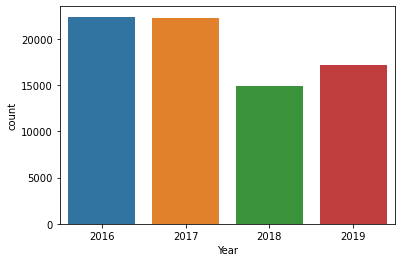

In [44]:
#a quick plot for total runners each year for half marathon:

sns.countplot(x="Year", data = half_all);

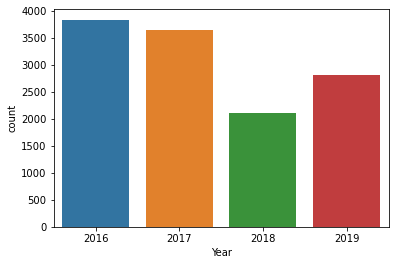

In [45]:
#a quick plot for total runners each year for full marathon:

sns.countplot(x="Year", data = full_all);

In [46]:
#create dataframe for total runners and runners that did not finish using numbers gathered from above and quick percent calculation:

data = {'year':  ['2016', '2017', '2018', '2019'],
        'total_runners_half':[22429, 22292, 14940, 17236],
        'runners_no_finish_half':[4509, 4580, 0, 3530],
        'percent_no_finish_half': [20, 21, 0, 20],
        'total_runners_full':[3842, 3651, 2115, 2811],
        'runners_no_finish_full':[864, 1056, 8, 786],
        'percent_no_finish_full': [22, 29, 0, 28]
        }

df = pd.DataFrame (data, columns = ['year','total_runners_half', 'runners_no_finish_half', 'percent_no_finish_half', 
                                    'total_runners_full', 'runners_no_finish_full', 'percent_no_finish_full'])

print(df.info()) 
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    4 non-null      object
 1   total_runners_half      4 non-null      int64 
 2   runners_no_finish_half  4 non-null      int64 
 3   percent_no_finish_half  4 non-null      int64 
 4   total_runners_full      4 non-null      int64 
 5   runners_no_finish_full  4 non-null      int64 
 6   percent_no_finish_full  4 non-null      int64 
dtypes: int64(6), object(1)
memory usage: 352.0+ bytes
None


,year,total_runners_half,runners_no_finish_half,percent_no_finish_half,total_runners_full,runners_no_finish_full,percent_no_finish_full
0,2016,22429,4509,20,3842,864,22
1,2017,22292,4580,21,3651,1056,29
2,2018,14940,0,0,2115,8,0
3,2019,17236,3530,20,2811,786,28


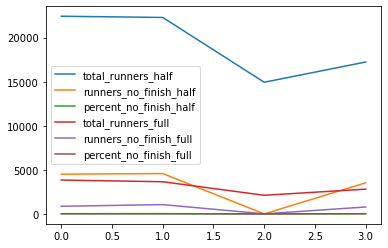

In [47]:
df.plot();

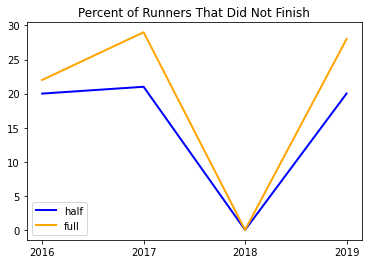

In [48]:
plt.plot( 'year', 'percent_no_finish_half', data=df, marker='', color='blue', linewidth=2, label='half')
plt.plot( 'year', 'percent_no_finish_full', data=df, marker='', color='orange', linewidth=2, label='full')
plt.title('Percent of Runners That Did Not Finish')
plt.legend();

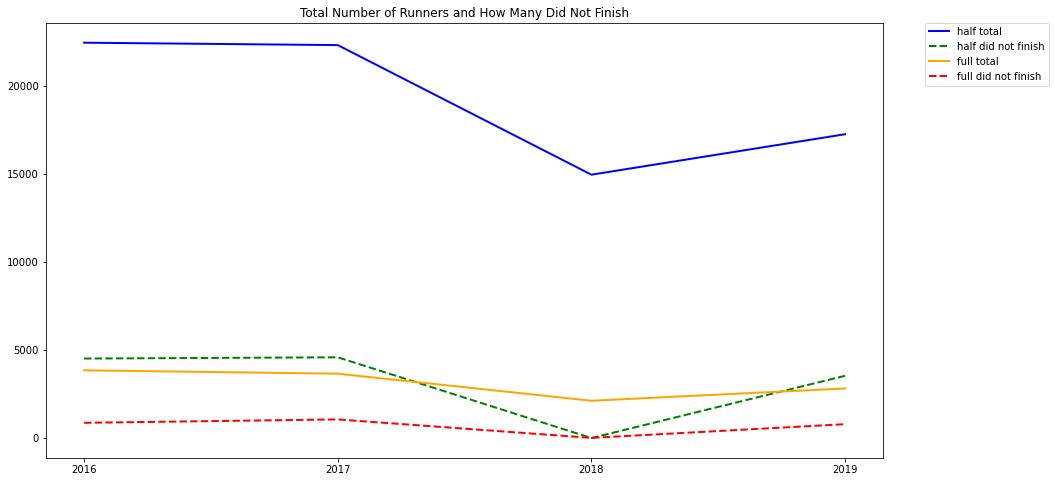

In [49]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot('year', 'total_runners_half', data=df, marker='', color='blue', linewidth=2, label='half total')
ax.plot('year', 'runners_no_finish_half', data=df, marker='', color='green', linewidth=2, linestyle='dashed', label='half did not finish')
ax.plot('year', 'total_runners_full', data=df, marker='', color='orange', linewidth=2, label='full total')
ax.plot('year', 'runners_no_finish_full', data=df, marker='', color='red', linewidth=2, linestyle='dashed', label='full did not finish')

ax.set_title('Total Number of Runners and How Many Did Not Finish')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

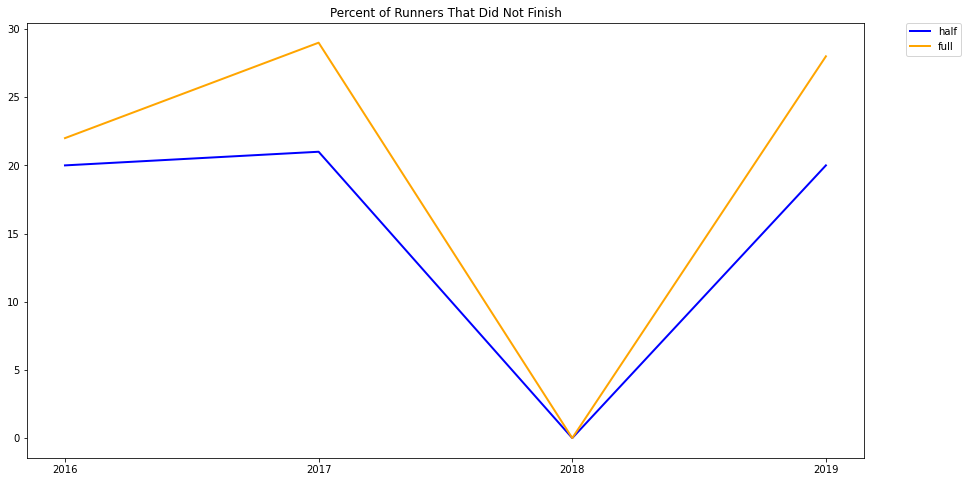

In [50]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot('year', 'percent_no_finish_half', data=df, marker='', color='blue', linewidth=2, label='half')
ax.plot('year', 'percent_no_finish_full', data=df, marker='', color='orange', linewidth=2, label='full')
ax.set_title('Percent of Runners That Did Not Finish')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

Why did everyone finish the half marathon and all but 8 finish the full marathon in 2018?
2018 max time for half: 06:26:37 (which is the max time for all 4 races, next highest is 06:18:24)
2018 max time for full: 06:54:09 (max time for all 4 races was 07:00:00)
Weather was nice - 72 high with 40 dewpoint
Not as many runners as other years

In [51]:
half_no_zeros.describe()

,Overall,Bib,Time
count,64278.000000,64278.000000,64278
mean,8212.974641,16399.949423,0 days 02:35:17.811677
std,5060.658312,10984.091883,0 days 00:34:51.709204
min,1.000000,2.000000,0 days 01:09:25
25%,4041.000000,7505.000000,0 days 02:10:04
50%,8080.000000,14151.500000,0 days 02:29:39
75%,12118.750000,24092.750000,0 days 02:55:19
max,99999.000000,60038.000000,0 days 06:26:37


In [52]:
full_no_zeros.describe()

,Overall,Bib,Time
count,9705.000000,9705.000000,9705
mean,2800.848429,21933.816692,0 days 04:48:27.211334
std,12405.240315,10573.284349,0 days 00:45:46.974559
min,1.000000,1.000000,0 days 01:26:11
25%,608.000000,12134.000000,0 days 04:15:30
50%,1214.000000,26059.000000,0 days 04:49:04
75%,1821.000000,31295.000000,0 days 05:22:04
max,99999.000000,60042.000000,0 days 07:00:00
